In [431]:
from pandas import DataFrame, read_csv
df = read_csv('data/baseball_data.csv')
df.handedness = df.handedness.astype('category')

In [432]:
df.describe()

,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000
mean,72.756266,184.513397,0.186793,45.359551
std,2.142272,15.445995,0.106175,74.065110
min,65.000000,140.000000,0.000000,0.000000
25%,71.000000,175.000000,0.138000,1.000000
50%,73.000000,185.000000,0.238000,15.000000
75%,74.000000,195.000000,0.258000,55.000000
max,80.000000,245.000000,0.328000,563.000000


### Delete Invalid rows ###
I removed players whose `avg` are zero.

In [433]:
# Delete invalid rows : avg == 0 is meaningless.
df = df[(df.avg > 0.0) & (df.HR > 0)]
df.describe()

,height,weight,avg,HR
count,871.000000,871.000000,871.000000,871.000000
mean,72.338691,182.846154,0.244201,60.253731
std,1.935478,14.971904,0.030703,79.940631
min,65.000000,140.000000,0.104000,1.000000
25%,71.000000,170.000000,0.232000,11.000000
50%,72.000000,180.000000,0.248000,27.000000
75%,74.000000,193.000000,0.263000,78.000000
max,80.000000,230.000000,0.328000,563.000000


I sorted by `avg` and `HR`. Interestingly, 4 players among top 5 are lefty. So I want to investigate `handedness` vs `avg` and `HR`.

In [434]:
df.sort(['avg', 'HR'], ascending=[0, 0])

,name,handedness,height,weight,avg,HR
281,Rod Carew,L,72,170,0.328,92
861,Lyman Bostock,L,73,180,0.311,23
547,Matty Alou,L,69,160,0.307,31
934,Ralph Garr,L,71,185,0.306,75
792,Bill Madlock,R,71,180,0.305,163
154,Tony Oliva,L,73,175,0.304,220
835,Manny Mota,R,70,160,0.304,31
357,Al Oliver,L,72,195,0.303,219
24,Pete Rose,B,71,192,0.303,160
857,Rico Carty,R,75,200,0.299,204


R    534
L    254
B     83
dtype: int64


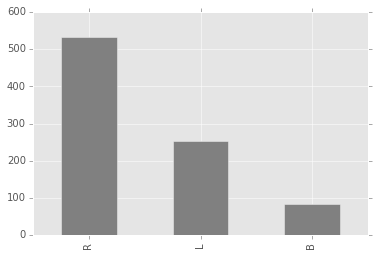

In [435]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
df.handedness.value_counts().plot(kind='bar', color='gray')
print df.handedness.value_counts()

In [436]:
df.groupby(by='handedness').mean()

,height,weight,avg,HR
handedness,,,,
B,71.771084,175.662651,0.244301,40.277108
L,72.342520,183.618110,0.252689,69.854331
R,72.425094,183.595506,0.240148,58.792135


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000528111D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000551019E8>]], dtype=object)

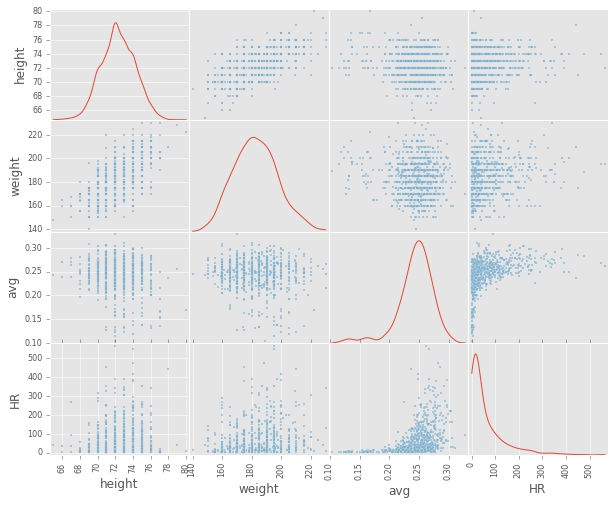

In [437]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.5, diagonal='kde', figsize=(10, 8))

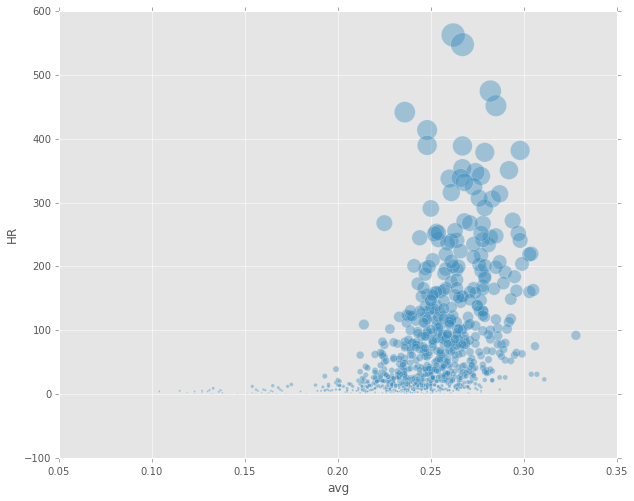

In [438]:
df.plot(kind='scatter', x='avg', y='HR', s=df.HR, alpha = 0.4, figsize=(10, 8))

In [439]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


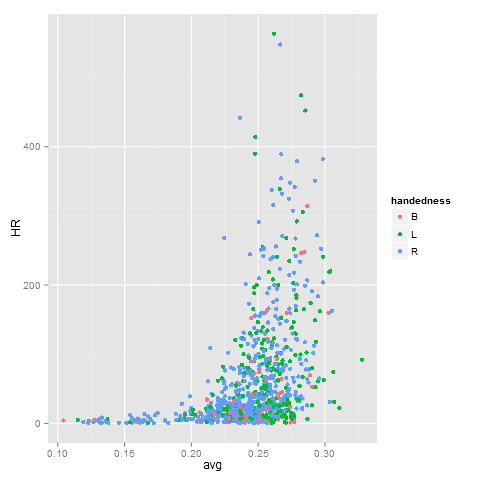

In [440]:
%%R -i df
df <- as.data.frame(df)
library(ggplot2)
qplot(x=avg, y=HR, color=handedness, data=df, position = "jitter")


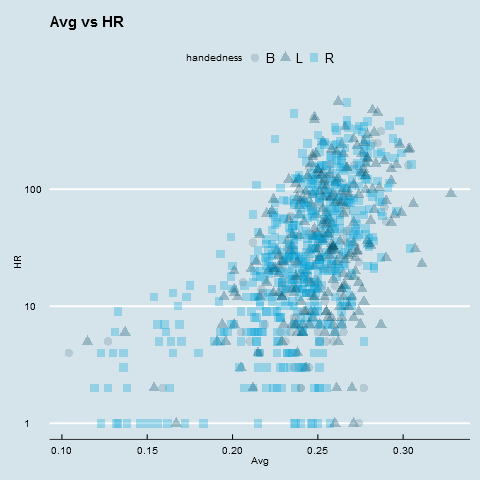

In [441]:
%%R -i df
df <- as.data.frame(df)
#df <- subset(df, df$handedness == 'R')
library(ggplot2)
library(ggthemes)
ggplot(aes(x = avg, y = HR), data = df) + 
    theme_economist() +
    scale_colour_economist() +
    geom_point(aes(colour = handedness, shape = handedness), 
               alpha=0.3, size=4) +
    scale_y_log10() +
    xlab('Avg') + 
    ylab('HR') +
    ggtitle("Avg vs HR")

In [442]:
import numpy as np
avg = np.array(df.avg).reshape(len(df.avg),1)
HR = np.array(df.HR).reshape(len(df.HR),1)
log_HR = np.log(HR)

In [443]:
# Take log and regression using Ordinary Least Square(OLS)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(avg, log_HR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

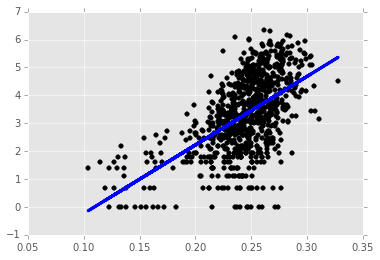

In [444]:
# Plot outputs
plt.scatter(avg, np.log(HR),  color='black')
plt.plot(avg, reg.predict(avg), color='blue',
         linewidth=3)

In [445]:
res = np.abs(log_HR - reg.predict(avg)).reshape(len(log_HR),1)
df['residual'] = res.flatten()
df = df.sort('residual')[1:int(len(res) * 0.9)]

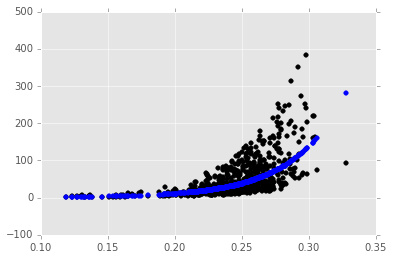

In [452]:
avg = np.array(df.avg).reshape(len(df.avg),1)
HR = np.array(df.HR).reshape(len(df.HR),1)
log_HR = np.log(HR)

# Take log and regression using Ordinary Least Square(OLS)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(avg, log_HR)
# Plot outputs
plt.scatter(avg, HR,  color='black')
plt.scatter(avg, np.exp(reg.predict(avg)),  color='blue')
# plt.plot(avg, np.exp(reg.predict(avg)), color='blue',
#          linewidth=3)

# removing outliers
res = np.abs(log_HR - reg.predict(avg)).reshape(len(log_HR),1)

df['residual'] = res.flatten()
df = df.sort('residual')[1:int(len(res) * 0.9)]

In [447]:
df = df.drop('residual', 1)

In [448]:
df.to_csv('data/cleand_baseball.csv', index=False)

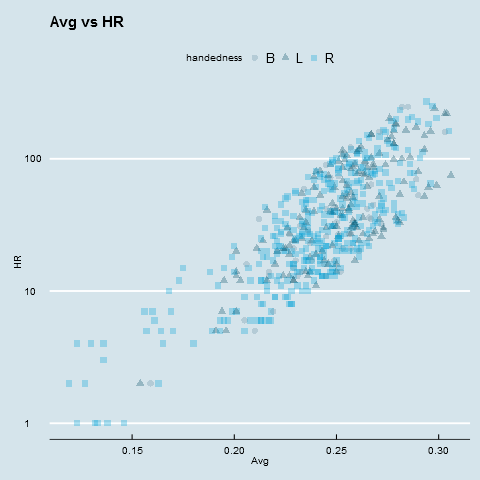

In [456]:
%%R -i df
df <- as.data.frame(df)
#df <- subset(df, df$handedness == 'R')
library(ggplot2)
library(ggthemes)
ggplot(aes(x = avg, y = HR), data = df) + 
    theme_economist() +
    scale_colour_economist() +
    geom_point(aes(colour = handedness, shape = handedness), 
               alpha=0.3, size=3) +
    scale_y_log10() +
    xlab('Avg') + 
    ylab('HR') +
    ggtitle("Avg vs HR")